<a href="https://colab.research.google.com/github/denizbaris/Machine_Learning/blob/main/ML_4_5_(Regularization_Ridge_Lasso_ElasticNet_Cross_Validation_Gridsearch)(TR)_15_Jan_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis =1)
y = df["sales"]

### Polynomial Conversion

In [5]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

In [6]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 55)

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [13]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score 

These values show where in the normal distribution they correspond to the z score.


In [14]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [17]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [20]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [21]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [22]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

![image-2.png](attachment:image-2.png)

In [23]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score

In [25]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [26]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.005447,0.004056,0.367902,-1.271247,-19.204259,-4.382266
2,0.004605,0.001893,0.879658,-0.710463,-2.713292,-1.647207
3,0.002763,0.001780,0.977560,-0.395033,-0.622901,-0.789240
4,0.002691,0.001739,0.989369,-0.418977,-0.289361,-0.537923
5,0.002713,0.001753,0.166596,-1.474093,-15.409856,-3.925539


In [27]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [28]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


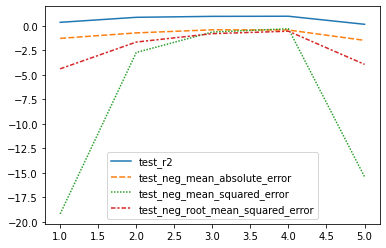

In [29]:
sns.lineplot(data = scores.iloc[:,2:]);

In [30]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [31]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

![image-2.png](attachment:image-2.png)

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_model = Ridge(alpha=1, random_state=42)

In [34]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [35]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [36]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [37]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


## For Ridge Regression CV with alpha : 1 

In [38]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [39]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007662,0.002157,0.988913,-0.405789,-0.336840,-0.580379
2,0.001709,0.001780,0.969951,-0.551469,-0.677493,-0.823099
3,0.001749,0.003646,0.950978,-0.552320,-1.360795,-1.166531
4,0.012409,0.001972,0.991259,-0.365106,-0.237919,-0.487769
5,0.001658,0.001770,0.986854,-0.343011,-0.243072,-0.493023


In [40]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


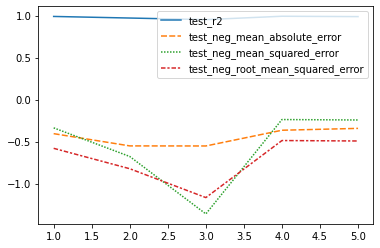

In [42]:
sns.lineplot(data = scores.iloc[:,2:])

In [43]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [44]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [45]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


## Choosing best alpha value with Cross-Validation

In [46]:
from sklearn.linear_model import RidgeCV

In [47]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [48]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [49]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

0.02

In [ ]:
ridge_cv_model.best_score_

-0.653040651955274

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [ ]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445636e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460874e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199234e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [ ]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [ ]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


![image.png](attachment:image.png)

## LASSO

![image.png](attachment:image.png)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


## For Lasso CV with Default Alpha : 1

In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004004,0.004000,0.924246,-1.155268,-2.301550,-1.517086
2,0.002999,0.000998,0.955624,-0.656358,-1.000530,-1.000265
3,0.001007,0.001995,0.888327,-1.072936,-3.099952,-1.760668
4,0.001997,0.000999,0.896199,-1.255165,-2.825429,-1.680901
5,0.002002,0.000998,0.903545,-1.056538,-1.783470,-1.335466


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


<AxesSubplot:>

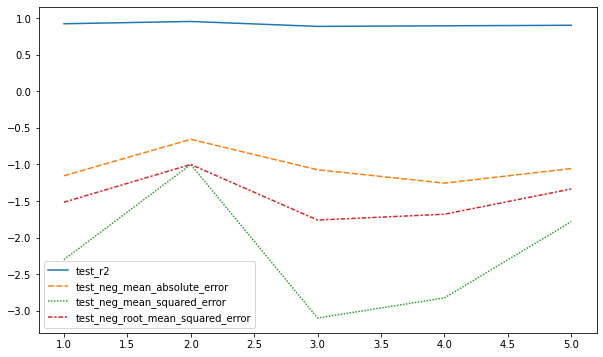

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


### Choosing best alpha value with Cross-Validation

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.alpha_

0.01

In [ ]:
#np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

In [ ]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [ ]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

0.41183329807008356

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


In [ ]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


## Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [ ]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [ ]:
elastic_cv_model.alpha_

0.01

In [ ]:
elastic_cv_model.l1_ratio_

1.0

In [ ]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

0.41183329807008356

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028


In [ ]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [ ]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [ ]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022068,0.002250,0.000841,0.000764,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.586201,-0.693806,-1.184123,-0.491352,-0.490280,-0.689152,0.258570,13
1,0.005498,0.001201,0.000601,0.000491,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.553277,-0.537915,-1.172816,-0.488299,-0.493055,-0.649072,0.263070,10
2,0.005683,0.001026,0.000400,0.000489,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.529432,-0.527849,-1.157311,-0.480464,-0.500409,-0.639093,0.259749,9
3,0.008999,0.001098,0.000401,0.000491,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.490240,-0.504487,-1.120156,-0.446524,-0.484072,-0.609096,0.256247,6
4,0.006430,0.001072,0.000401,0.000491,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.470398,-0.497256,-1.110933,-0.437316,-0.481998,-0.599580,0.256435,3
5,0.007069,0.002051,0.000837,0.000425,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.455118,-0.493277,-1.098376,-0.430248,-0.484677,-0.592339,0.254000,2
6,0.006779,0.001364,0.000801,0.000400,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
7,0.013687,0.003837,0.000222,0.000391,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.606883,-0.654207,-1.214541,-0.509165,-0.495180,-0.695995,0.266011,14
8,0.004581,0.000869,0.000000,0.000000,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.573940,-0.553763,-1.195471,-0.509639,-0.498213,-0.666205,0.266088,12
9,0.004638,0.000505,0.000227,0.000453,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.552026,-0.551934,-1.180732,-0.504933,-0.506986,-0.659322,0.261517,11


In [ ]:
grid_model.best_index_

6

In [ ]:
grid_model.best_score_

-0.5908719878682442

## Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


## Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [ ]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [ ]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature importances with Ridge

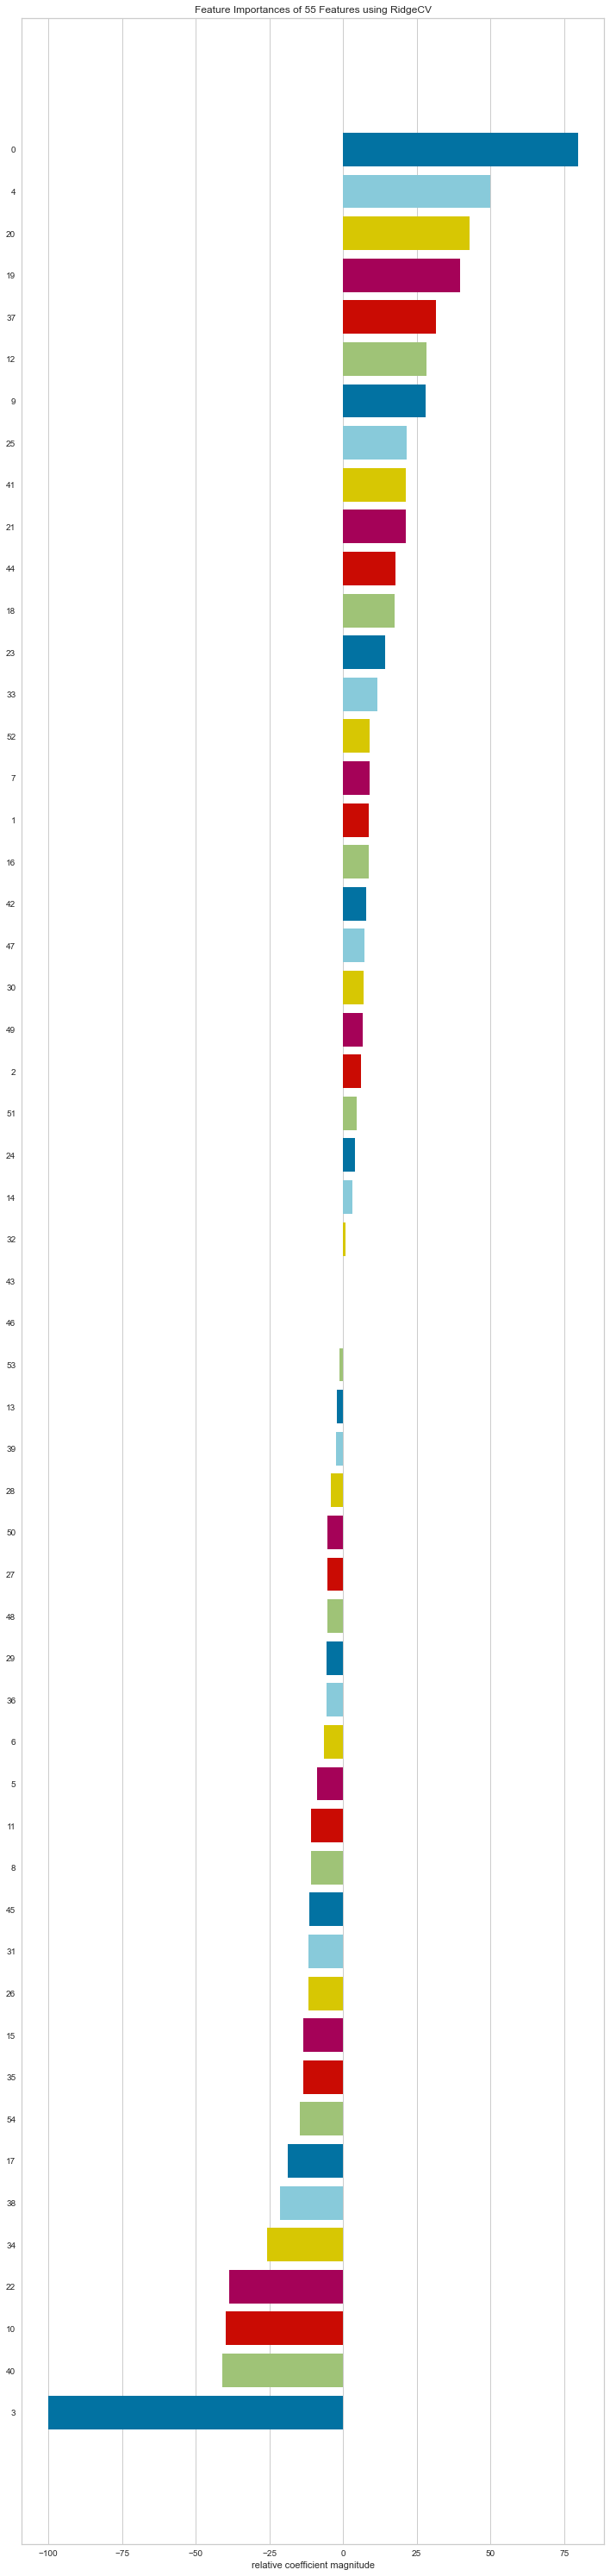

<AxesSubplot:title={'center':'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

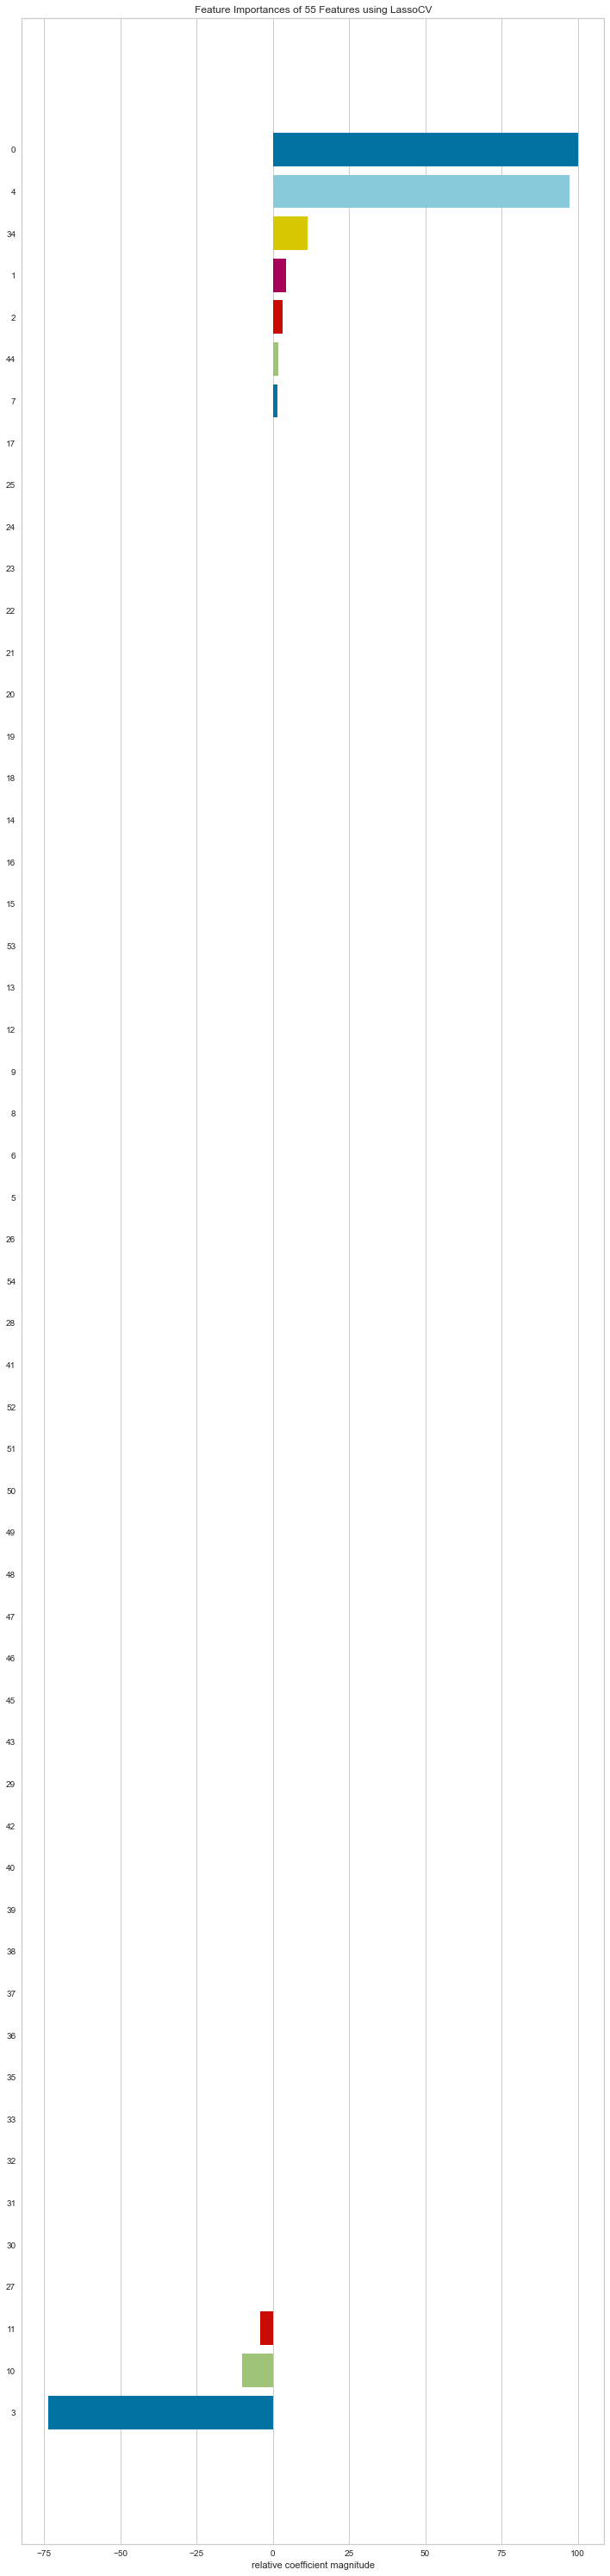

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()